<a href="https://colab.research.google.com/github/Bhavyasaradhi/HDS5210_InClass/blob/master/Final_Project_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo](https://www.slu.edu/marcom/tools-downloads/-img/logo/left-aligned/slu-2-left-blue-rgb.png)

# **HDS5210: Programming for Health Data Scientists**

# Final Project
Tuesday, 12/10

# Project Goal

How happy people feel today? Did people used to be happier? W What impact do our living circumstances have on every bit of this?

# Abstract

In this project the focus is to study how the levels of happiness have developed over time and within societies. And the goals of the project themselves: whether people are happier today than in the past and what factors make people happy in different cultures and areas, and to what extent living conditions, including socio-economic, natural and availability of resources, affect happiness. By the means of it we aim at identifying patterns, associations, and indicators of happiness and subjective well-being in today’s society.

# Introduction

Happiness is a universal aspiration and a critical indicator of societal well-being. Understanding what drives happiness and how it varies across nations can provide valuable insights for improving global living conditions. This project leverages insights from the World Happiness Report (WHR)—a comprehensive survey ranking happiness in 149 countries as published by the United Nations (UN). The WHR examines how citizens perceive their happiness, utilizing life factor variables to explain differences in life satisfaction at the national level.

This study focuses on analyzing happiness trends across societies, the factors influencing well-being, and how living conditions affect personal and national happiness. By investigating key metrics such as GDP per capita, social support, life expectancy, freedom, generosity, and corruption perception, we aim to uncover what contributes most significantly to happiness.

While the WHR provides rich data for this analysis, it excludes variables like unemployment and inequality due to the lack of comparable global data. Still it a wonderful dataset which can offer insights into how societies can enhance life satisfaction.


In [514]:
# Ref: https://www.javatpoint.com/ipython-display
from IPython.core.display import display
from IPython.display import IFrame

display(IFrame('https://ourworldindata.org/grapher/happiness-cantril-ladder', '100%', '900px'))

The map presents the average scores for answering the question about life satisfaction for different countries on a continuum. Based on the popularity of the ladder metaphor used in the map, the researchers use figures ranging from 0 to 10 to demonstrate that there are enormous differences in the happiness index around the globe.

Northern European countries dominate the results as the nations that consistently perform the best; they include Finland, Denmark, Iceland, Switzerland, the Netherlands. On the lower side, afghanistan is followed by south sudan and several central sub-Saharan African nations with low level of life satisfaction being suggestive of poor living standards and socio-economic difficulties.

# Dataset Sources

1. https://worldhappiness.report/ed/2024/#appendices-and-data

2. https://www.kaggle.com/datasets/atom1991/world-happiness-report-2023

3. https://huggingface.co/datasets/Slapping/Happiness/tree/main

# About Datasets

1. **World Happiness Report 2024 :** Public work which is a publication of the Wellbeing Research Centre at the University of Oxford, UK. This is the latest report and it utilizes life evaluations from the Gallup World Poll. This is downloaded from the original website.

2. **World Happiness Report 2005 - 2022 :** It published by the Sustainable Development Solutions Network (SDSN) and powered by Gallup World Poll data, provides valuable insights into happiness rankings and factors influencing well-being. This is a preprocessed data uploaded by Vivek Agrawal on kaggle and this is uploaded 2 years ago. The link has 2 datasets where one is for 2023 and other dataset has data from 2005 to 2022.

3. **World Happiness Report 2023 :** This is also a similar dataset to the one explained above. It was uploaded by a user named Slapping on the Hugging Face platform at the end of 2023.

# Dataset Information

The datasets are in xls, csv and xlsx

The datasets provides:

- **Country Name:** Name of the country.  
- **ISO Alpha:** ISO alpha-2/3 country code.  
- **Regional Indicator:** Regional classification of the country.  
- **Happiness Score:** Numerical value representing happiness levels.  
- **Standard Error of Ladder Score:** Uncertainty in happiness score.  
- **Upper Whisker:** Maximum happiness score range.  
- **Lower Whisker:** Minimum happiness score range.  
- **Logged GDP per Capita:** Log-transformed GDP per capita (economic measure).  
- **Social Support:** Level of perceived social connections/support.  
- **Healthy Life Expectancy:** Average healthy years expected to live.  
- **Freedom to Make Life Choices:** Perceived freedom to make personal decisions.  
- **Generosity:** Level of generosity or altruism.  
- **Perceptions of Corruption:** Public perception of corruption in the country.  
- **Ladder Score in Dystopia:** Hypothetical happiness score for a dystopian society.  
- **Explained by Log GDP per Capita:** GDP per capita's contribution to happiness score.  
- **Explained by Social Support:** Social support's role in happiness score.  
- **Explained by Healthy Life Expectancy:** Impact of healthy life expectancy on happiness.  
- **Explained by Freedom to Make Life Choices:** Effect of perceived freedom on happiness.  
- **Explained by Generosity:** Role of generosity in explaining happiness.  
- **Explained by Perceptions of Corruption:** Influence of perceived corruption on happiness.  
- **Dystopia + Residual:** Captures unexplained factors and dystopian conditions.  


# Import

In [515]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Pandas is a powerful tool for data manipulation, seaborn builds on matplotlib to create attractive statistical plots, and matplotlib.pyplot allows for customized plotting.

# Load

In [516]:
# Load the Excel file
file_path = "DataForFigure2.1+with+sub+bars+2024.xls"
data1 = pd.read_excel(file_path)
data2 = pd.read_csv("whr_200522.csv")

file_path = 'WHR.xlsx'
data3 = pd.read_excel(file_path)

# Functions

In [517]:
def re(df, num, nam):
    """
      Renames a column in a DataFrame based on its index (0-based)
    """
    if num < 0 or num >= len(df.columns):
        raise IndexError("Column number is out of range.")

    # Renaming
    col_mapping = {df.columns[num]: nam}
    return df.rename(columns=col_mapping)

Loads data from an Excel file and a CSV file into pandas DataFrames, ensuring all datasets are ready for analysis or visualization.

# Preprocessing

In [518]:
data1.head(2)

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887


In [519]:
data2.head(2)

,Country name,Iso alpha,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,AFG,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,AFG,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237


In [520]:
data3.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [521]:
data1.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [522]:
data2.columns

Index(['Country name', 'Iso alpha', 'year', 'Happiness score',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [523]:
data3.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [524]:
data1.shape

(143, 11)

In [525]:
data2.shape

(2199, 12)

In [526]:
data3.shape

(156, 9)

In [527]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

In [528]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   Iso alpha                         2199 non-null   object 
 2   year                              2199 non-null   int64  
 3   Happiness score                   2199 non-null   float64
 4   Log GDP per capita                2179 non-null   float64
 5   Social support                    2186 non-null   float64
 6   Healthy life expectancy at birth  2145 non-null   float64
 7   Freedom to make life choices      2166 non-null   float64
 8   Generosity                        2126 non-null   float64
 9   Perceptions of corruption         2083 non-null   float64
 10  Positive affect                   2175 non-null   float64
 11  Negative affect                   2183 non-null   float64
dtypes: flo

In [529]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [530]:
data1 = data1.drop_duplicates()

In [531]:
data2 = data2.drop_duplicates()

In [532]:
data3 = data3.drop_duplicates()

In [533]:
data1.isnull().sum()

,0
Country name,0
Ladder score,0
upperwhisker,0
lowerwhisker,0
Explained by: Log GDP per capita,3
Explained by: Social support,3
Explained by: Healthy life expectancy,3
Explained by: Freedom to make life choices,3
Explained by: Generosity,3
Explained by: Perceptions of corruption,3


In [534]:
data2.isnull().sum()

,0
Country name,0
Iso alpha,0
year,0
Happiness score,0
Log GDP per capita,20
Social support,13
Healthy life expectancy at birth,54
Freedom to make life choices,33
Generosity,73
Perceptions of corruption,116


In [535]:
data3.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [536]:
data1 = data1.dropna()

In [537]:
data2 = data2.dropna()

In [538]:
data3 = data3.dropna()

In [539]:
data2['year'].nunique()

18

In [540]:
data2['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2007, 2020, 2022, 2006, 2005])

In [541]:
data1['year'] = 2024

In [542]:
data3['year'] = 2023

In [543]:
data2 = re(data2, 6, 'Healthy life expectancy')

In [544]:
data2 = re(data2, 4, 'GDP per capita')

In [545]:
data2 = re(data2, 3, 'Score')

In [546]:
data3 = re(data3, 1, 'Country name')

In [547]:
data2.columns

Index(['Country name', 'Iso alpha', 'year', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [548]:
data3.columns

Index(['Overall rank', 'Country name', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [549]:
cc = set(data2.columns) & set(data3.columns)
cc = list(cc)
cc

['GDP per capita',
 'Perceptions of corruption',
 'Country name',
 'year',
 'Score',
 'Social support',
 'Healthy life expectancy',
 'Generosity',
 'Freedom to make life choices']

In [550]:
# Merging two datasets
mdata = pd.merge(data2, data3, on= cc, how='outer')

In [551]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  2114 non-null   object 
 1   Iso alpha                     1958 non-null   object 
 2   year                          2114 non-null   int64  
 3   Score                         2114 non-null   float64
 4   GDP per capita                2114 non-null   float64
 5   Social support                2114 non-null   float64
 6   Healthy life expectancy       2114 non-null   float64
 7   Freedom to make life choices  2114 non-null   float64
 8   Generosity                    2114 non-null   float64
 9   Perceptions of corruption     2114 non-null   float64
 10  Positive affect               1958 non-null   float64
 11  Negative affect               1958 non-null   float64
 12  Overall rank                  156 non-null    float64
dtypes: 

In [552]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                140 non-null    object 
 1   Ladder score                                140 non-null    float64
 2   upperwhisker                                140 non-null    float64
 3   lowerwhisker                                140 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + residual

In [553]:
# Ladder score -> Score
data1 = re(data1, 1, 'Score')

In [554]:
data1 = re(data1, 4, 'GDP per capita')

In [555]:
data1 = re(data1, 5, 'Social support')

In [556]:
data1 = re(data1, 6, 'Healthy life expectancy')

In [557]:
data1 = re(data1, 7, 'Freedom to make life choices')

In [558]:
data1 = re(data1, 8, 'Generosity')

In [559]:
data1 = re(data1, 9, 'Perceptions of corruption')

In [560]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Score                         140 non-null    float64
 2   upperwhisker                  140 non-null    float64
 3   lowerwhisker                  140 non-null    float64
 4   GDP per capita                140 non-null    float64
 5   Social support                140 non-null    float64
 6   Healthy life expectancy       140 non-null    float64
 7   Freedom to make life choices  140 non-null    float64
 8   Generosity                    140 non-null    float64
 9   Perceptions of corruption     140 non-null    float64
 10  Dystopia + residual           140 non-null    float64
 11  year                          140 non-null    int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 14.2+ KB


In [561]:
df = pd.merge(mdata, data1, on= cc, how='outer')

I began preprocessing the data by first understanding the dataset. Next, I removed duplicates, checked for null values, and eliminated them. I added a year column to two datasets, as it was missing and would be needed for analysis. Following this, I renamed columns in all the datasets for consistency. Finally, I merged all the datasets to create a unified dataset for further analysis.

# Analysis

In [562]:
df.head()

,Country name,Iso alpha,year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Overall rank,upperwhisker,lowerwhisker,Dystopia + residual
0,Venezuela,NaN,2024,5.6067,0.000,1.32135,0.491138,0.517913,0.192265,0.086162,NaN,NaN,NaN,5.724563,5.488837,2.997888
1,Somalia,NaN,2023,4.6680,0.000,0.69800,0.268000,0.559000,0.243000,0.270000,NaN,NaN,112.0,NaN,NaN,NaN
2,Central African Republic,NaN,2023,3.0830,0.026,0.00000,0.105000,0.225000,0.235000,0.035000,NaN,NaN,155.0,NaN,NaN,NaN
3,Burundi,NaN,2023,3.7750,0.046,0.44700,0.380000,0.220000,0.176000,0.180000,NaN,NaN,145.0,NaN,NaN,NaN
4,Liberia,NaN,2023,3.9750,0.073,0.92200,0.443000,0.370000,0.233000,0.033000,NaN,NaN,141.0,NaN,NaN,NaN


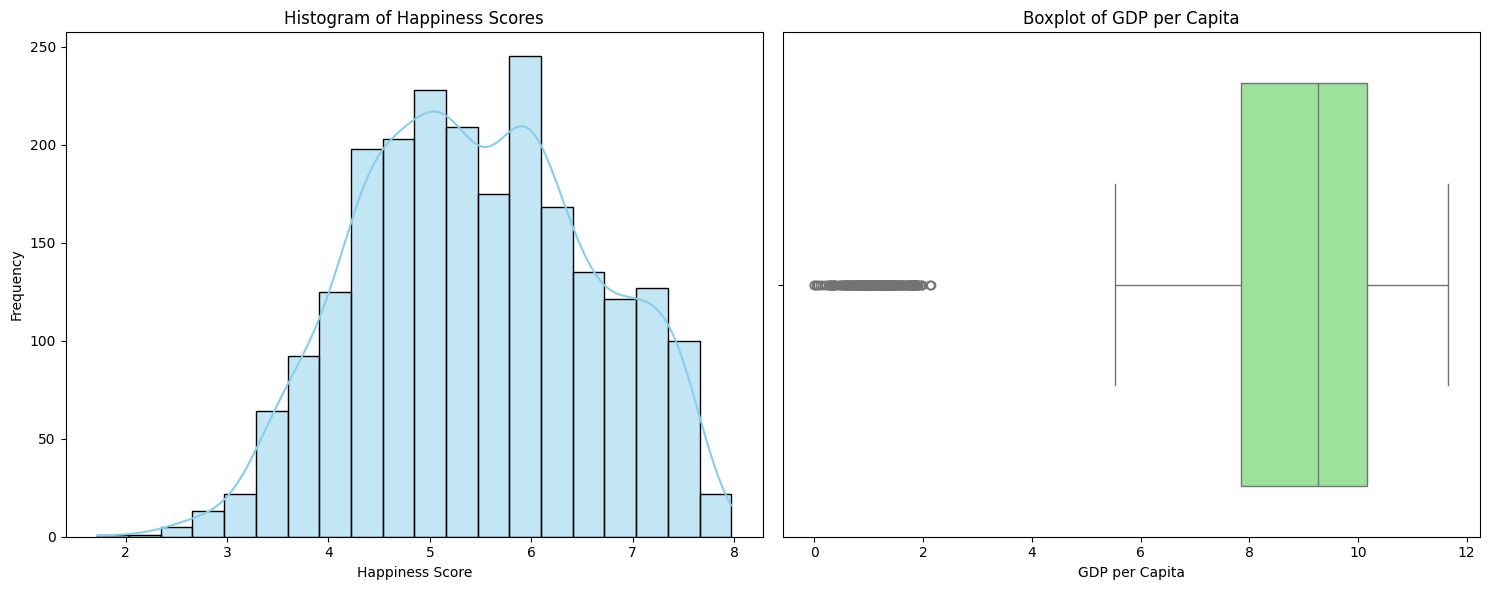

In [563]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Histogram for 'Happiness Score'
sns.histplot(df['Score'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Happiness Scores')
axes[0].set_xlabel('Happiness Score')
axes[0].set_ylabel('Frequency')

# Plot Boxplot for 'GDP per Capita'
sns.boxplot(x=df['GDP per capita'], color='lightgreen', ax=axes[1])
axes[1].set_title('Boxplot of GDP per Capita')
axes[1].set_xlabel('GDP per Capita')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


By analyzing the histogram, one realizes that the majority of the countries have happiness scores ranging between 2 and 8, a small right shift, and an average happiness score of about 5. An interquartile range of 4 to 8 is highly represented and there are several points below 2 and over 10 in the boxplot indicating a median GDP per capita of 6. They are not correlated but possibly, higher GDP per capita brings about higher levels of happiness.

In [564]:
# Top 25 WHR countries in 2023 and 2024
df_2024 = df[df['year'] == 2024]
df_2024 = df_2024.sort_values(by='Score', ascending=False)

In [565]:
df_2023 = df[df['year'] == 2023]
df_2023 = df_2023.sort_values(by='Score', ascending=False)

Created a subset of datasets for comparing shifts between 2023 and 2024

# Happiness score

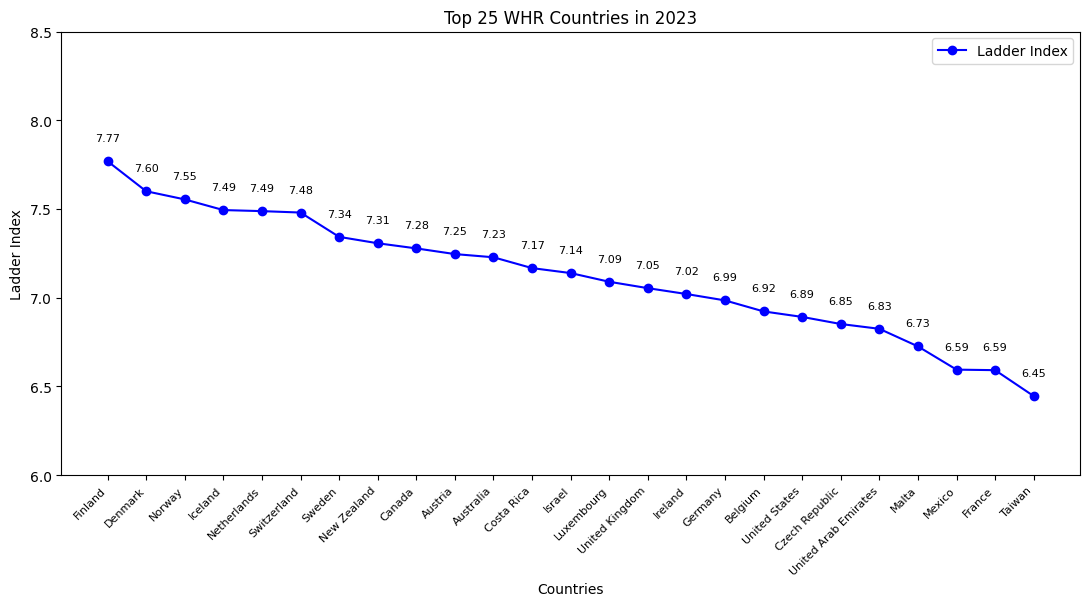

In [566]:
x = df_2023['Country name'].head(25)
y = df_2023['Score'].head(25)

# Create a line plot
plt.figure(figsize=(11, 6))
plt.plot(x, y, marker='o', color='blue', label='Ladder Index')  # Line with markers

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=8)

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('Ladder Index')
plt.ylim(6, 8.5)
plt.tight_layout()
plt.title('Top 25 WHR Countries in 2023')
plt.legend()

# Annotate points
for i, val in enumerate(y):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


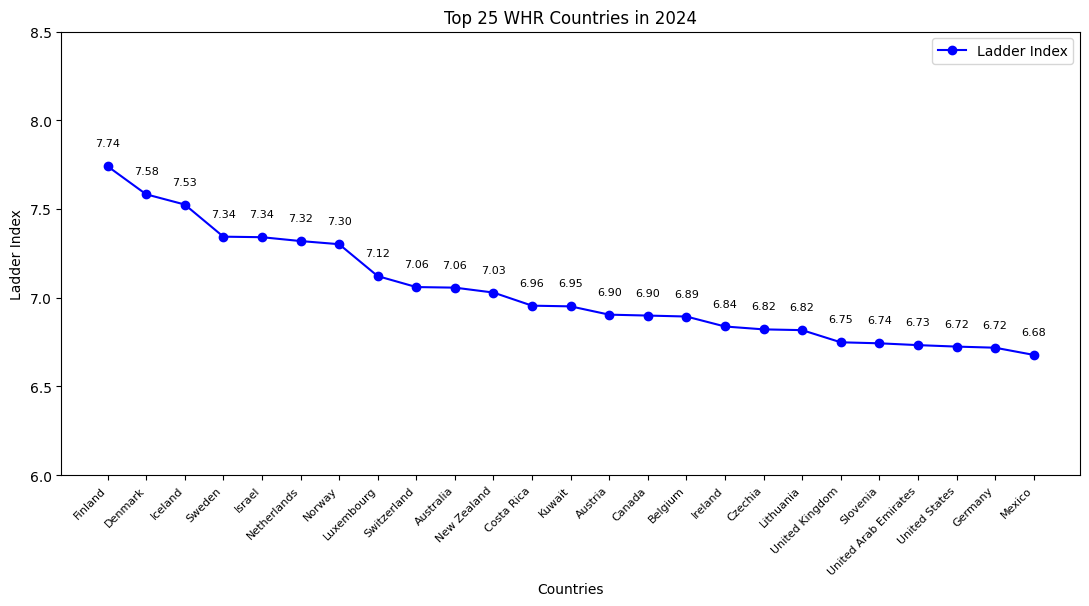

In [567]:
x = df_2024['Country name'].head(25)
y = df_2024['Score'].head(25)

# Create a line plot
plt.figure(figsize=(11, 6))
plt.plot(x, y, marker='o', color='blue', label='Ladder Index')  # Line with markers

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=8)

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('Ladder Index')
plt.ylim(6, 8.5)
plt.tight_layout()
plt.title('Top 25 WHR Countries in 2024')
plt.legend()

# Annotate points
for i, val in enumerate(y):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


When comparing happiness levels between 2023 and 2024, Israel and Luxembourg experienced an increase in happiness, while Norway and Germany saw slight decreases. Notably, the USA also experienced a decline in happiness. Malta, which was in the top 25 in 2023, is no longer in the top 25 in 2024, whereas Kuwait and Slovenia have entered the top 25 this year. France has also dropped out of the top 25. Overall, the highest-ranking countries saw slight decreases in happiness, while countries at the lower end of the top 25 experienced modest increases.

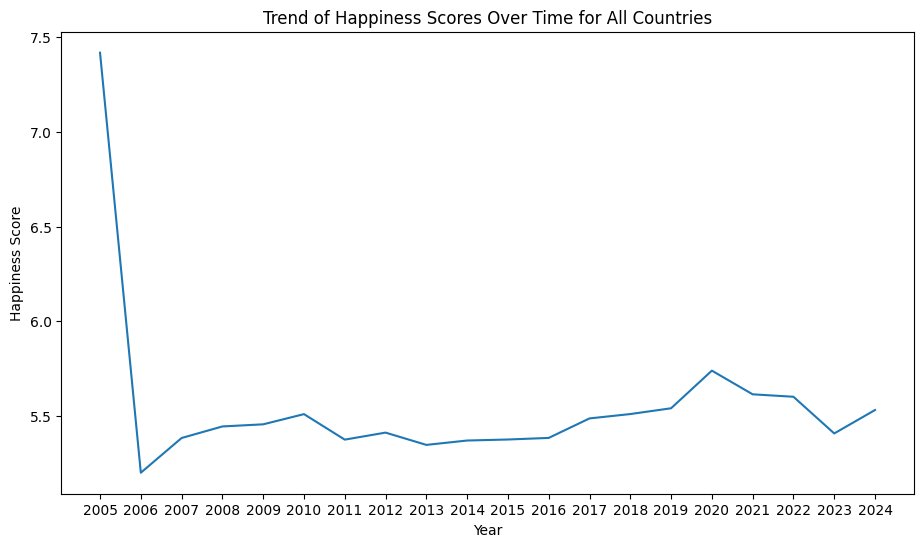

In [568]:
# Create the pivot table
pivot1 = pd.pivot_table(df, values='Score', index='Country name', columns='year')

# Reset index to make 'Country name' a column again
pivot1 = pivot1.reset_index()

# Create a line plot to visualize the trend of 'Happiness scores' over time for all countries
plt.figure(figsize=(11, 6))
sns.lineplot(x='year', y='Score', data=df, errorbar=None)

# Add a title to the line plot for context
plt.title('Trend of Happiness Scores Over Time for All Countries')

# Label the x-axis and y-axis for better interpretation
plt.xlabel('Year')
plt.ylabel('Happiness Score')

# Ensure all years appear on the x-axis
years = sorted(df['year'].unique())  # Get all unique years and sort them
plt.xticks(ticks=years, labels=years)  # Set ticks and labels explicitly
plt.show()


When we compare all years, 2005 was the most happiest year for the world.

In [569]:
pivot2 = pd.pivot_table(df, values='Score', index='Country name', aggfunc='mean')
pivot2 = pivot2.sort_values(by='Score', ascending=False)
pivot225 = pivot2.head(25)
pivot225

,Score
Country name,
Denmark,7.645206
Finland,7.635041
Norway,7.474050
Iceland,7.461100
Netherlands,7.445612
Switzerland,7.445371
Sweden,7.373506
Canada,7.288756
Israel,7.267950


Overall Denmark people are happiest and after that Finland people are second short by few points.

# GDP per capita

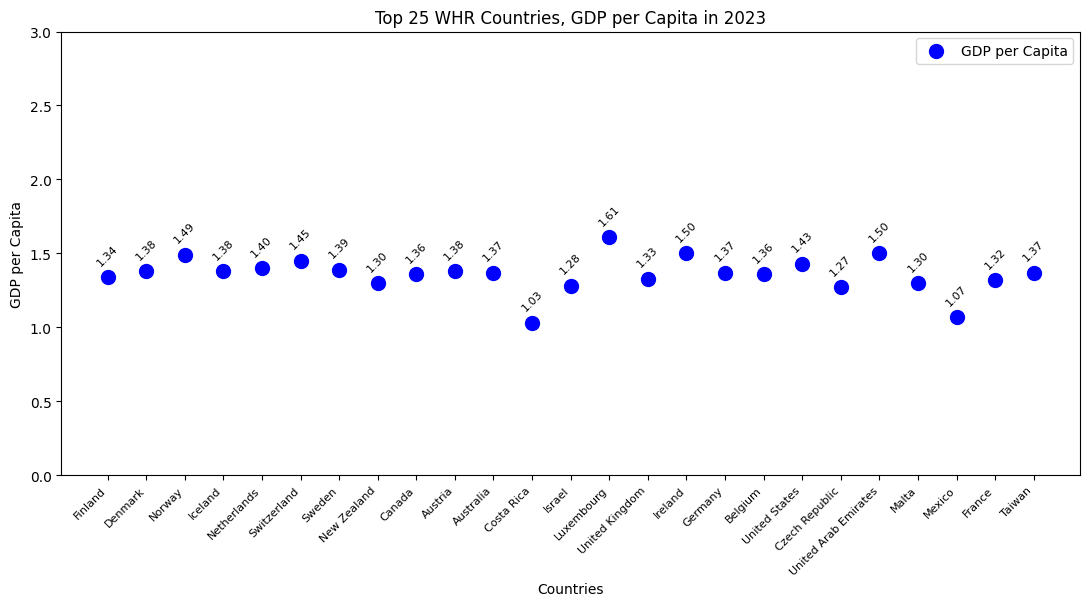

In [570]:
x = df_2023['Country name'].head(25)
y = df_2023['GDP per capita'].head(25).round(2)

plt.figure(figsize=(11, 6))

# Create a scatter plot
plt.scatter(x, y, color='blue', label='GDP per Capita', s=100)  # s controls marker size

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)

# Annotate each point
for i, val in enumerate(y):
    plt.text(i, val + 0.08, f'{val:.2f}', ha='center', fontsize=8, rotation=45)

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('GDP per Capita')
plt.ylim(0, 3)  # Adjust Y-axis range
plt.tight_layout()
plt.title('Top 25 WHR Countries, GDP per Capita in 2023')
plt.legend()

# Show the plot
plt.show()


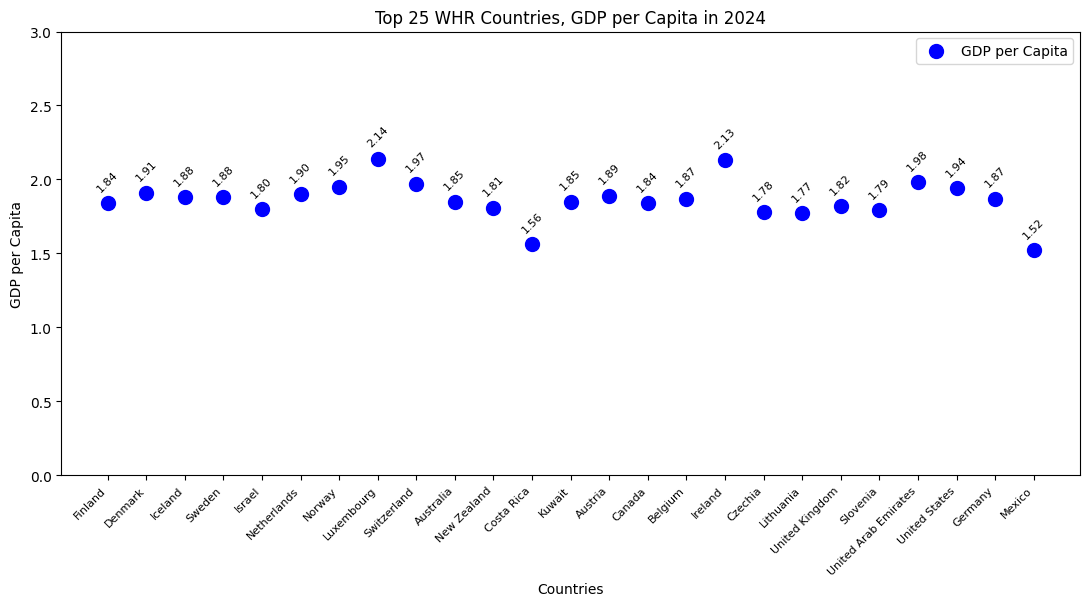

In [571]:
x = df_2024['Country name'].head(25)
y = df_2024['GDP per capita'].head(25).round(2)

plt.figure(figsize=(11, 6))

# Create a scatter plot
plt.scatter(x, y, color='blue', label='GDP per Capita', s=100)  # s controls marker size

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)

# Annotate each point
for i, val in enumerate(y):
    plt.text(i, val + 0.08, f'{val:.2f}', ha='center', fontsize=8, rotation=45)

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('GDP per Capita')
plt.ylim(0, 3)  # Adjust Y-axis range
plt.tight_layout()
plt.title('Top 25 WHR Countries, GDP per Capita in 2024')
plt.legend()

# Show the plot
plt.show()


In 2023, most GDP values ranged between 1.5 and 1, while in 2024, they increased significantly to a range of 1.5 to 2.1. This substantial growth in GDP over one year suggests that economic factors like income can play an important role.


<ipython-input-572-e5522b345bc0>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pivot3, x='Score', y='GDP per capita', palette='viridis', legend=False)


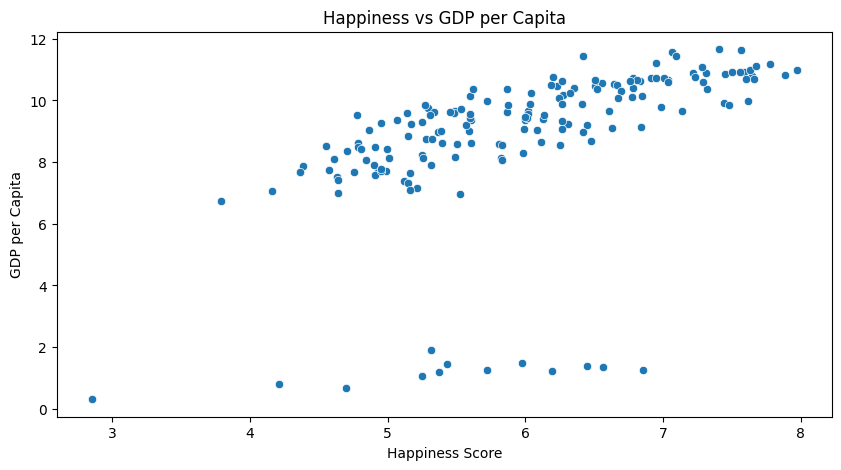

In [572]:
# Pivot table to summarize 'Score' and 'GDP per capita' by country
pivot3 = pd.pivot_table(df, values=['Score', 'GDP per capita'], index='Country name', aggfunc='max')

# Set the size of the figure for better visibility of the scatter plot
plt.figure(figsize=(10, 5))
plt.title('Happiness vs GDP per Capita')
sns.scatterplot(data=pivot3, x='Score', y='GDP per capita', palette='viridis', legend=False)

# Label the x-axis with 'Happiness Score' for better interpretation
plt.xlabel('Happiness Score')

# Label the y-axis with 'GDP per Capita' for clarity
plt.ylabel('GDP per Capita')
plt.show()


We can observe an increasing pattern in GDP as the happiness score rises, suggesting that happiness may be influenced by economic factors such as income.

In [573]:
pivot4 = pd.pivot_table(df, values=['Score', 'GDP per capita'], index='Country name', aggfunc='mean')
pivot4 = pivot4.sort_values(by='GDP per capita', ascending=False)
pivot425 = pivot4.head(25)
pivot425

,GDP per capita,Score
Country name,,
Luxembourg,10.247751,7.068493
Trinidad and Tobago,10.217000,6.281400
Ireland,10.103324,7.028056
Singapore,10.092007,6.497587
Czechia,9.883799,6.651486
United States,9.882580,6.995694
Suriname,9.874000,6.269000
Denmark,9.865655,7.645206
Netherlands,9.809686,7.445612


Luxembourg's population has been spending more and enjoying a higher standard of living overall from 2005 to 2024.

# Life expentancy

In [574]:
y= df_2023['Healthy life expectancy'].head(25).round(2)

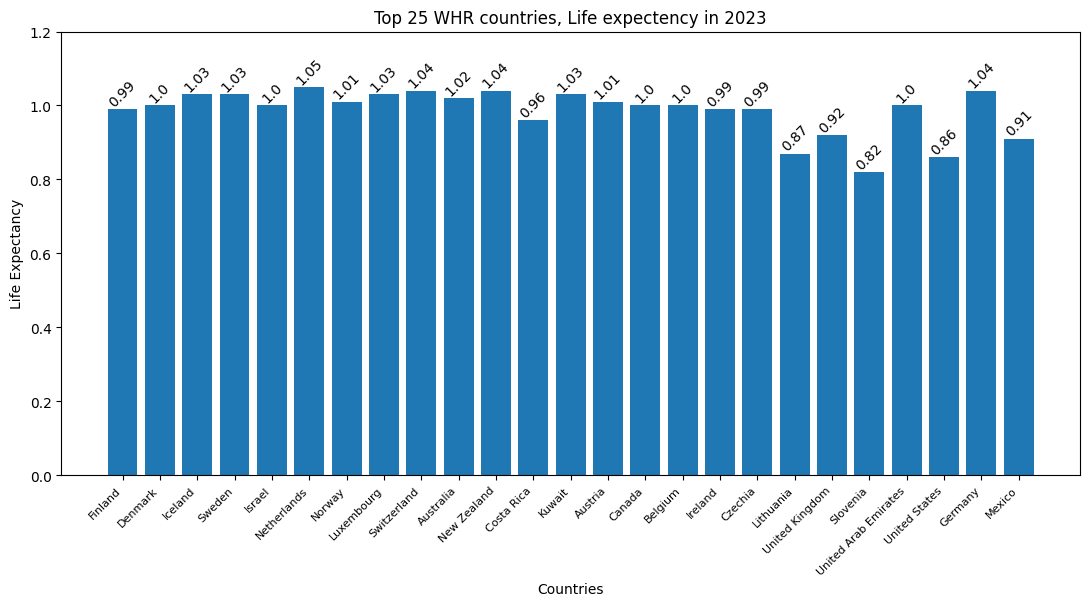

In [575]:
plt.figure(figsize=(11,6))
plt.xticks(rotation=45, ha='right', fontsize=8)

b= plt.bar(x,y)

for bar in b:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str((height)),
             ha='center',
             va='bottom',
             rotation=45)

plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.ylim(top=1.2)
plt.tight_layout()
plt.title('Top 25 WHR countries, Life expectency in 2023')
plt.show()

In [576]:
y= df_2024['Healthy life expectancy'].head(25).round(2)

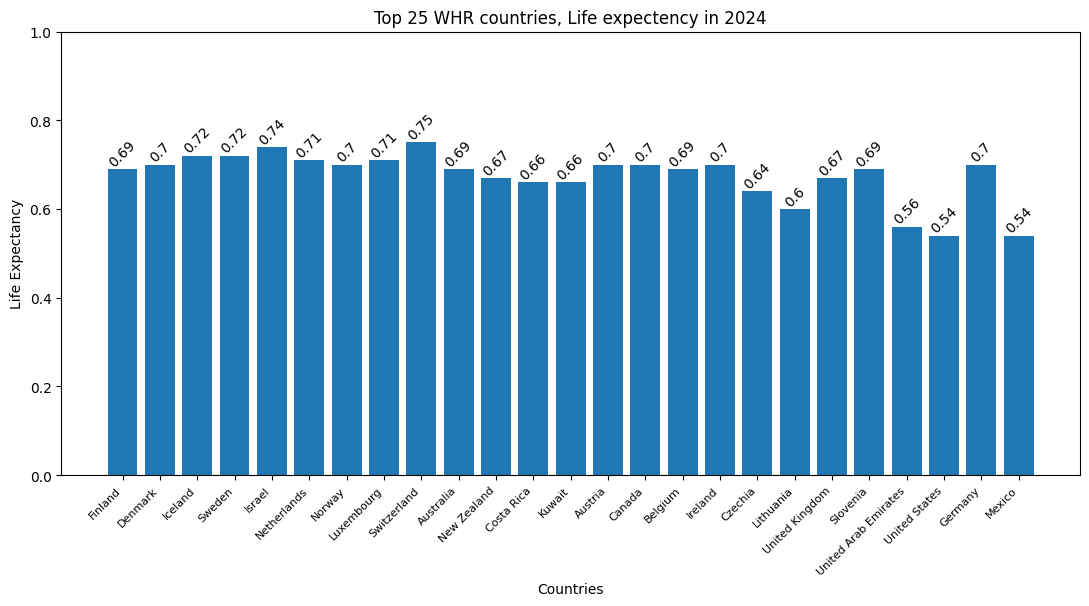

In [577]:
plt.figure(figsize=(11,6))
plt.xticks(rotation=45, ha='right', fontsize=8)

b =plt.bar(x,y)
for bar in b:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str((height)),
             ha='center',
             va='bottom',
             rotation=45)

plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.ylim(top=1)
plt.tight_layout()
plt.title('Top 25 WHR countries, Life expectency in 2024')
plt.show()


Life expectancy decreased from 2023 to 2024, with a minimum decline of 0.3 observed across all countries.

<Figure size 1100x600 with 0 Axes>

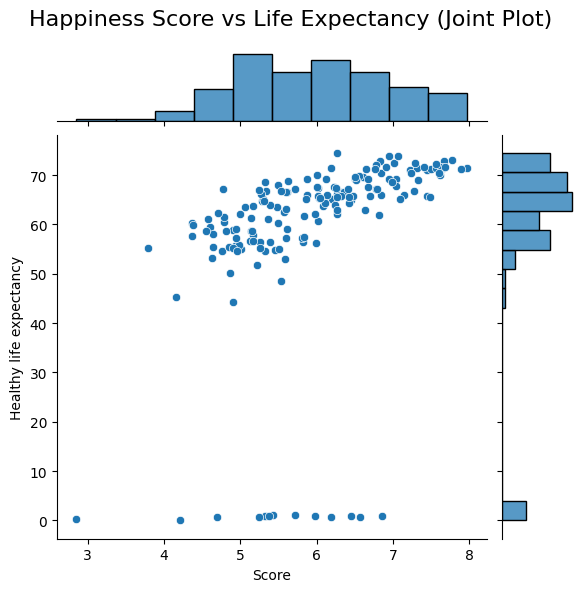

In [578]:
plt.figure(figsize=(11, 6))

# Create a pivot table
pivot5 = pd.pivot_table(df, values=['Score', 'Healthy life expectancy'], index='Country name', aggfunc='max')

# Create a joint plot to visualize both the relationship and distribution
g = sns.jointplot(x='Score', y='Healthy life expectancy', data=pivot5, kind='scatter')
g.fig.suptitle('Happiness Score vs Life Expectancy (Joint Plot)', size=16)
g.fig.subplots_adjust(top=0.91)

# Display the plot
plt.show()


We observe a positive correlation and an increasing trend, indicating that higher happiness is associated with greater life expectancy.

In [579]:
pivot6 = pd.pivot_table(df, values=['Score', 'Healthy life expectancy'], index='Country name', aggfunc='mean')
pivot6 = pivot6.sort_values(by='Healthy life expectancy', ascending=False)
pivot625 = pivot6.head(25)
pivot625

,Healthy life expectancy,Score
Country name,,
Japan,65.024285,5.998635
Belize,64.650000,6.203500
South Korea,64.014757,5.896494
Israel,63.993823,7.267950
France,63.781797,6.634611
Spain,63.698413,6.448606
Sweden,63.677382,7.373506
Italy,63.658818,6.260972
Trinidad and Tobago,63.628000,6.281400



The people of Japan have had the highest life expectancy overall from 2005 to 2024.

In [580]:
# Country with the highest GDP per capita
gdp = pivot4.idxmax()['GDP per capita']

# Country with the highest Healthy life expectancy
life = pivot6.idxmax()['Healthy life expectancy']

# Country with the highest Score
score = pivot2.idxmax()['Score']

print(f"Country with highest GDP per capita: {gdp}")
print(f"Country with highest Healthy life expectancy: {life}")
print(f"Country with highest Score: {score}")


Country with highest GDP per capita: Luxembourg
Country with highest Healthy life expectancy: Japan
Country with highest Score: Denmark


# Corruption

Text(0.5, 1.0, 'Correlation Matrix of Key Indicators')

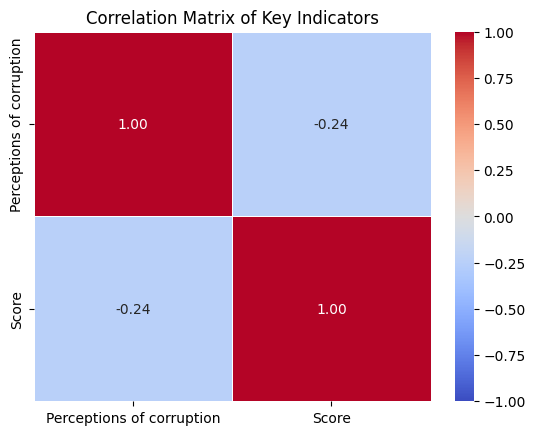

In [581]:
a = df[['Perceptions of corruption', 'Score']]
a = a.corr()
sns.heatmap(a, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Matrix of Key Indicators')

Corruption shows a negative correlation with happiness, indicating that higher levels of corruption are associated with lower happiness levels.

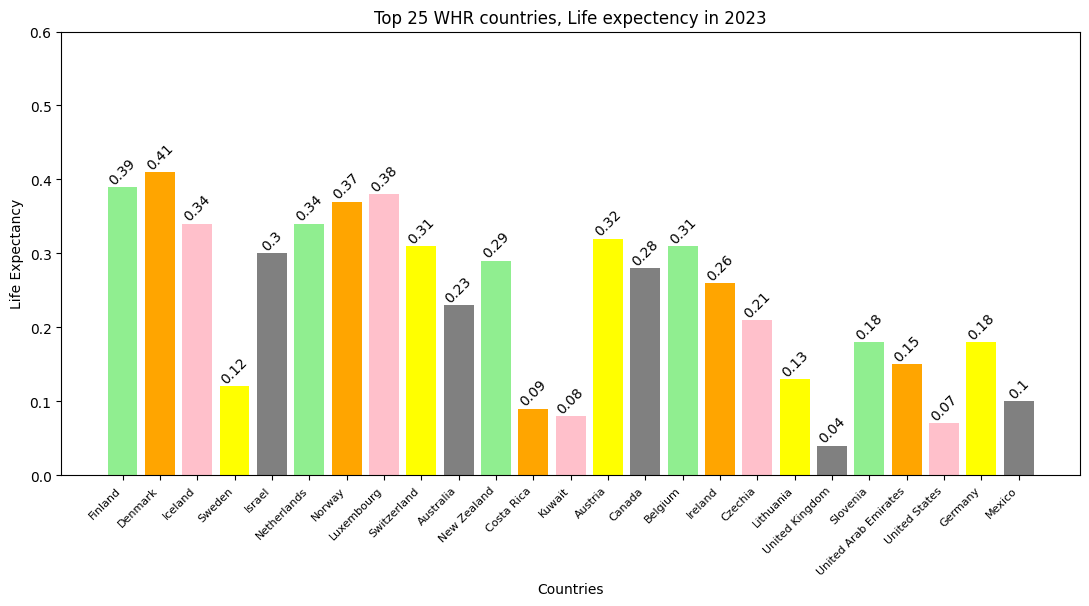

In [582]:
y= df_2023['Perceptions of corruption'].head(25).round(2)
color = ['lightgreen', 'orange', 'pink', 'yellow', 'gray']
plt.figure(figsize=(11,6))
plt.xticks(rotation=45, ha='right', fontsize=8)

b= plt.bar(x,y,color=color)

for bar in b:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str((height)),
             ha='center',
             va='bottom',
             rotation=45)

plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.ylim(top= 0.6)
plt.tight_layout()
plt.title('Top 25 WHR countries, Life expectency in 2023')
plt.show()

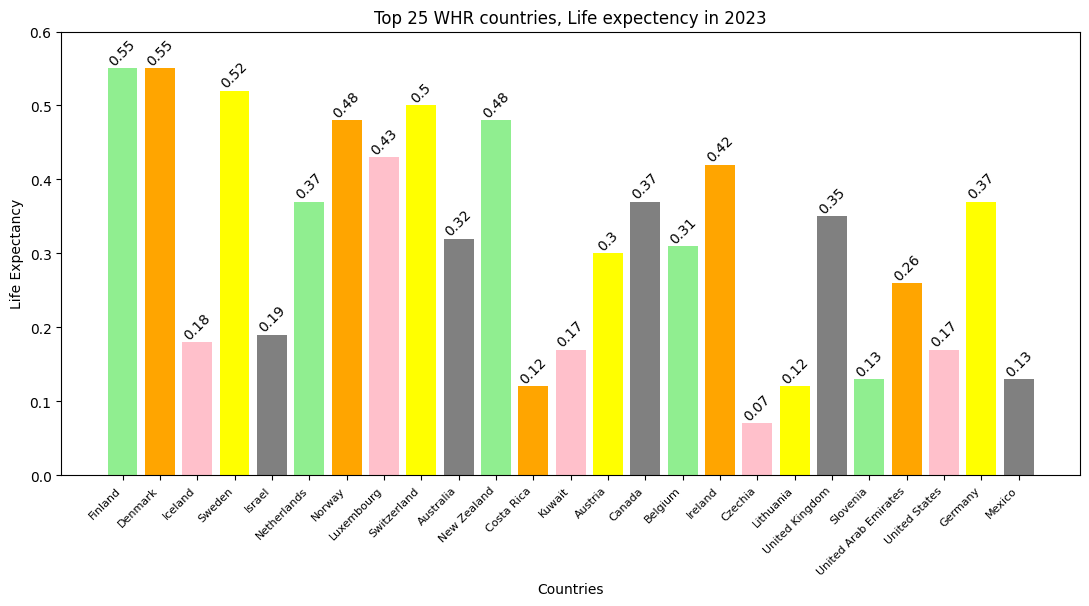

In [583]:
y= df_2024['Perceptions of corruption'].head(25).round(2)
color = ['lightgreen', 'orange', 'pink', 'yellow', 'gray']
plt.figure(figsize=(11,6))
plt.xticks(rotation=45, ha='right', fontsize=8)

b= plt.bar(x,y,color=color)

for bar in b:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str((height)),
             ha='center',
             va='bottom',
             rotation=45)

plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.ylim(top= 0.6)
plt.tight_layout()
plt.title('Top 25 WHR countries, Life expectency in 2023')
plt.show()

Corruption increased by at least 0.2 from 2023 to 2024 across all top 25 countries.

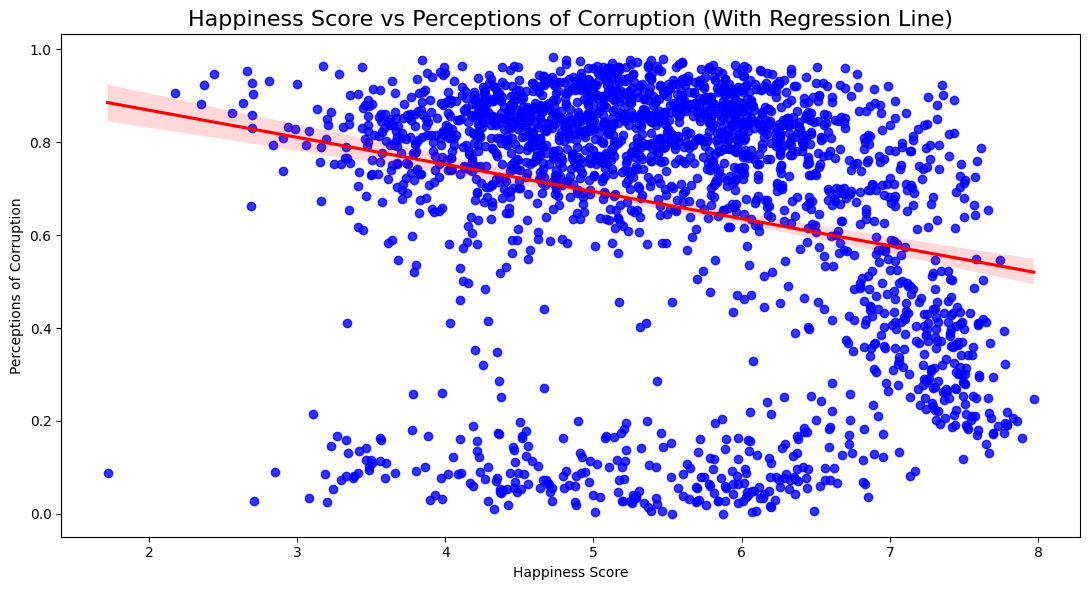

In [584]:
plt.figure(figsize=(11, 6))

# Create a scatter plot with a regression line
sns.regplot(x='Score', y='Perceptions of corruption', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add a title to the plot
plt.title('Happiness Score vs Perceptions of Corruption (With Regression Line)', size=16)

# Label the axes
plt.xlabel('Happiness Score')
plt.ylabel('Perceptions of Corruption')

# Display the plot
plt.tight_layout()
plt.show()


From the scatter plot with the regression line, we can observe a decreasing pattern, indicating that higher levels of corruption negatively affect happiness.

In [585]:
pivot7 = pd.pivot_table(df, values=['Score', 'Perceptions of corruption'], index='Country name', aggfunc='mean')
pivot7 = pivot7.sort_values(by='Perceptions of corruption', ascending=False)
pivot725 = pivot7.head(25)
pivot725

,Perceptions of corruption,Score
Country name,,
Trinidad and Tobago,0.927000,6.281400
Angola,0.866750,4.420250
Czechia,0.837418,6.651486
Romania,0.837254,5.830541
Guyana,0.836000,5.993000
Moldova,0.832131,5.641784
Ukraine,0.831494,4.771842
Indonesia,0.828616,5.252226
Bosnia and Herzegovina,0.825063,5.280750


Trinidad and Tobago has had the highest levels of corruption overall from 2005 to 2024.

# Conclusion

Therefore, this project was intended to identify the changes that have taken place, especially in trying to understand what impacts on happiness. In the aggregated time series of prospective happiness scores to be calculated from 2005 to 2024, yearly changes were characterized by volatility in different countries where many economic, social, and political factors intervened. The presented graph can be divided into two major parts: the first one refers to countries that became happier, and the second part relates to the sharpening of the leaders’ unhappiness. Few of the tested variables like GDP, corruption, life expectancy, and living conditions affected happiness at a significant level. According to the results of the study, factors favoring increased happiness include economic performance as well as a healthy/perfect diet while factors that negatively contribute towards well-being include corruption and other social evils. Therefore, it could be strongly stated that such elements as richness and good health make people happier, on the other hand, corruption decreases happiness levels. Therefore, eat like the Japanese, work like the Luxembourgers, and do not incur any additional costs to corruption.

# More

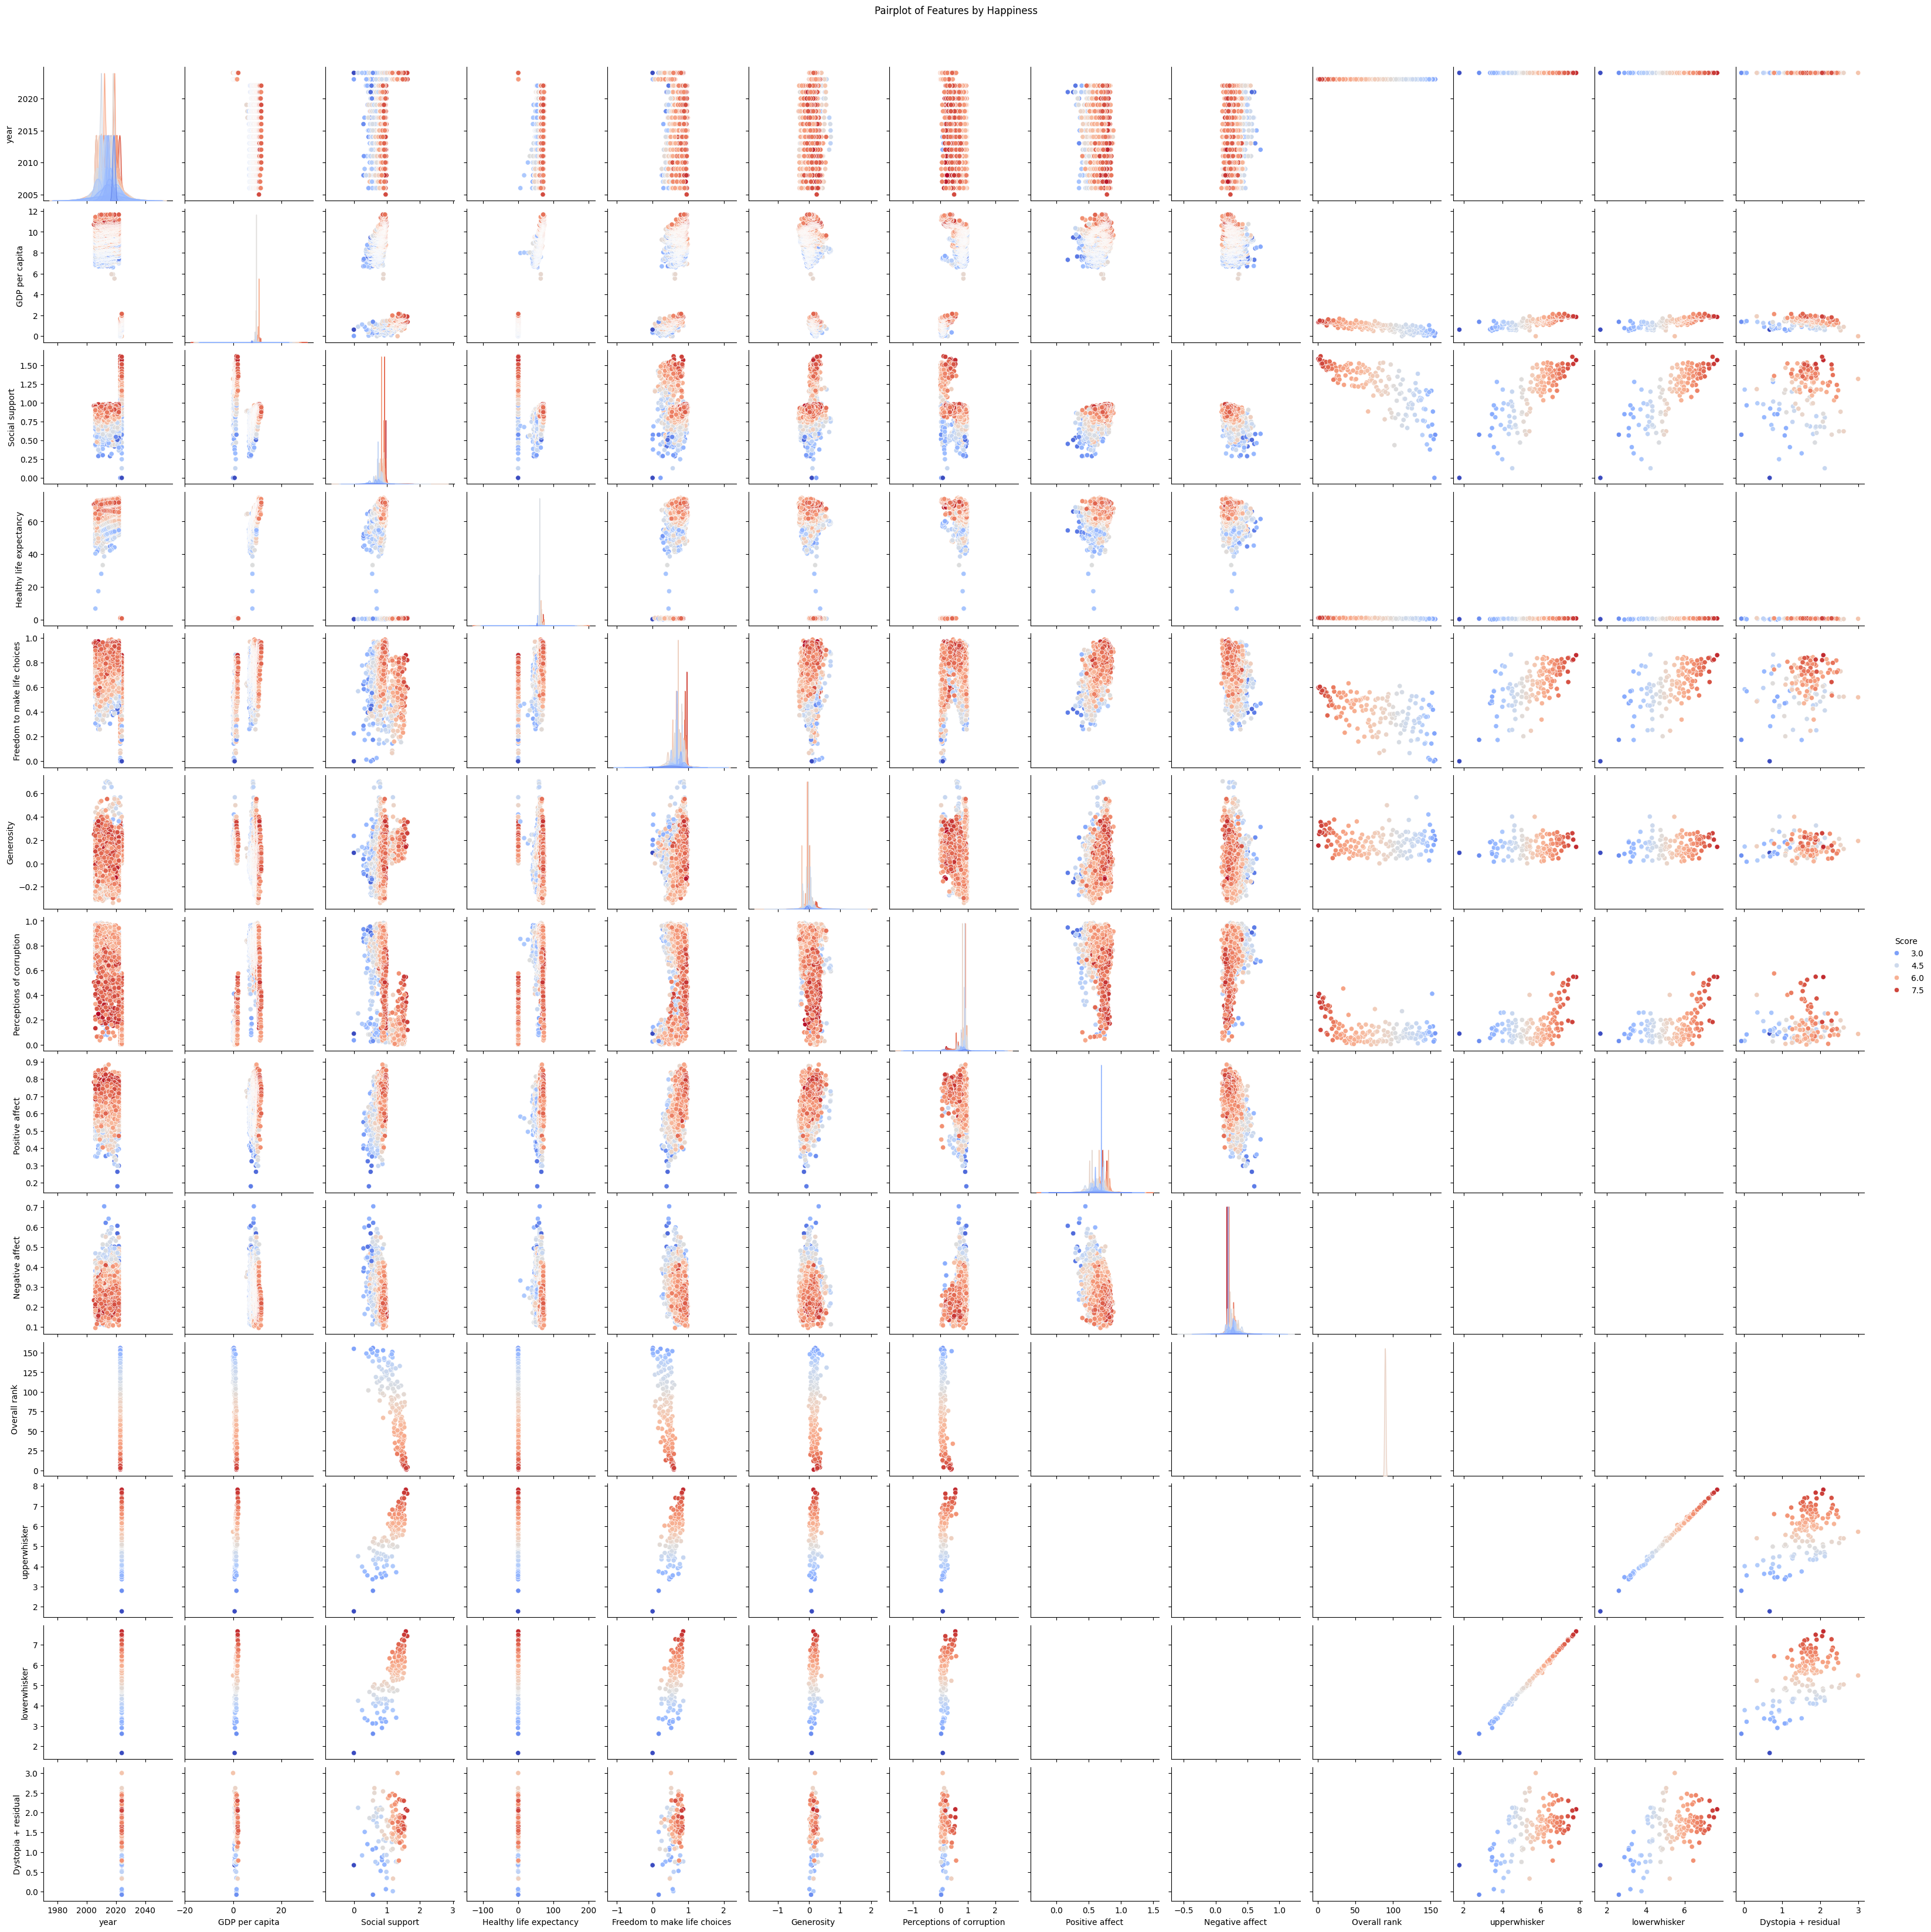

In [586]:
sns.pairplot(df, hue='Score', palette="coolwarm")
plt.suptitle('Pairplot of Features by Happiness', y=1.02)
plt.show()
